# Dataloper
1. Abiyyu Fathin Derian
2. Alifia C Harmadi
3. Dhea Fajriati Anas
4. Hendri Prabowo
5. Nikolas Rakryan Widagdo
______

# Churn prediction with multilayer perceptron model (MLP)

# Import Library

In [377]:
# basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# connect to drive
from google.colab import drive
drive.mount('/content/drive')

# import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# train_test split
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report

# visualization and tensorflow
import seaborn as sn
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [378]:
# load from github link
df = pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/Practical%20Case/train_df6.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70000,151.65,Yes


# Exploratory data analysis (EDA)

In [379]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6942 non-null   object 
 1   gender            6942 non-null   object 
 2   SeniorCitizen     6942 non-null   int64  
 3   Partner           6942 non-null   object 
 4   Dependents        6942 non-null   object 
 5   tenure            6942 non-null   int64  
 6   PhoneService      6942 non-null   object 
 7   MultipleLines     6942 non-null   object 
 8   InternetService   6942 non-null   object 
 9   OnlineSecurity    6942 non-null   object 
 10  OnlineBackup      6942 non-null   object 
 11  DeviceProtection  6942 non-null   object 
 12  TechSupport       6942 non-null   object 
 13  StreamingTV       6942 non-null   object 
 14  StreamingMovies   6942 non-null   object 
 15  Contract          6942 non-null   object 
 16  PaperlessBilling  6942 non-null   object 


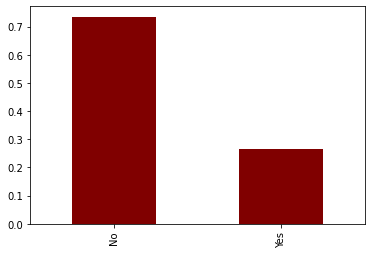

In [380]:
# check the comparation of churn label
df['Churn'].value_counts(normalize=True).plot.bar(color='maroon');

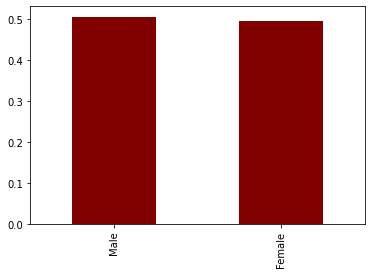

In [381]:
# check the comparation of gender
df['gender'].value_counts(normalize=True).plot.bar(color='maroon');

In [382]:
# Chek the data of Total Charge
df['TotalCharges'][:20]

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [383]:
# check the total value
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
3641.5      1
220.65      1
363.15      1
5656.75     1
1758.6      1
Name: TotalCharges, Length: 6437, dtype: int64

In [384]:
# check the white space 
null_total_charges = df[df['TotalCharges'] == ' ']
null_total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55000,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25000,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85000,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75000,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05000,,No


# Data Pre-processing

In [385]:
# Encode the target variable
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [386]:
# Let us check the replacement
df['Churn'].value_counts()

0    5103
1    1839
Name: Churn, dtype: int64

In [387]:
# Check the percentage of churn rate
print("Churn rate: ", df[df['Churn'] == 1].shape[0] * 100 / df.shape[0])

Churn rate:  26.49092480553155


In [388]:
# replace the white space with null value
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df['TotalCharges'].describe()

count   6931.00000
mean    2281.20311
std     2268.01252
min       18.80000
25%      399.80000
50%     1392.25000
75%     3793.05000
max     8684.80000
Name: TotalCharges, dtype: float64

In [389]:
# drop null value
df.dropna(inplace=True)

In [390]:
# Check null values
df.isnull().sum().sum()

0

In [391]:
# reset the index
df.reset_index(inplace=True)

# drop index column
df.drop(columns=['index'], inplace=True)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000,29.85000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95000,1889.50000,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000,108.15000,1


In [392]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6931 non-null   object 
 1   gender            6931 non-null   object 
 2   SeniorCitizen     6931 non-null   int64  
 3   Partner           6931 non-null   object 
 4   Dependents        6931 non-null   object 
 5   tenure            6931 non-null   int64  
 6   PhoneService      6931 non-null   object 
 7   MultipleLines     6931 non-null   object 
 8   InternetService   6931 non-null   object 
 9   OnlineSecurity    6931 non-null   object 
 10  OnlineBackup      6931 non-null   object 
 11  DeviceProtection  6931 non-null   object 
 12  TechSupport       6931 non-null   object 
 13  StreamingTV       6931 non-null   object 
 14  StreamingMovies   6931 non-null   object 
 15  Contract          6931 non-null   object 
 16  PaperlessBilling  6931 non-null   object 


In [393]:
# check numerical dataset 
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6931.00000,6931.00000,6931.00000
mean,32.41581,64.75210,2281.20311
std,24.56402,30.10526,2268.01252
min,1.00000,18.25000,18.80000
25%,9.00000,35.45000,399.80000
50%,29.00000,70.35000,1392.25000
75%,55.50000,89.85000,3793.05000
max,72.00000,118.75000,8684.80000


In [394]:
# normalize MonthlyCharges
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

In [395]:
# normalize TotalCharges
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()

In [396]:
# normalize tenure
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

In [397]:
# set 5 numbers after comma
pd.options.display.float_format = "{:.5f}".format

In [398]:
# check the numerical dataset
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6931.00000,6931.00000,6931.00000
mean,0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000
min,-1.27894,-1.87880,-2.57551
25%,-0.95326,-0.76244,-0.60860
50%,-0.13906,0.38989,0.19417
75%,0.93976,0.80125,0.83900
max,1.61147,1.27015,1.37199


In [399]:
# check the unique value of each column
for column in list(df.columns):
    print(column, df[column].nunique())

customerID 6931
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1578
TotalCharges 6436
Churn 2


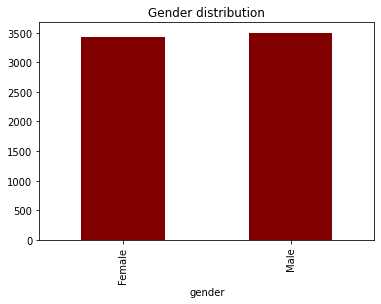

In [400]:
# check the gender distribution
df.groupby('gender').count()['customerID'].plot(kind='bar',
                                                color='maroon',
                                                grid=False,
                                                figsize=(6,4),
                                                title='Gender distribution');

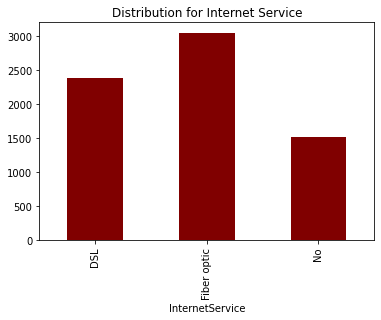

In [401]:
# check the internet service distribution
df.groupby('InternetService').count()['customerID'].plot(kind='bar',
                                                         color='maroon',
                                                         grid=False,
                                                         figsize=(6,4),
                                                         title='Distribution for Internet Service');

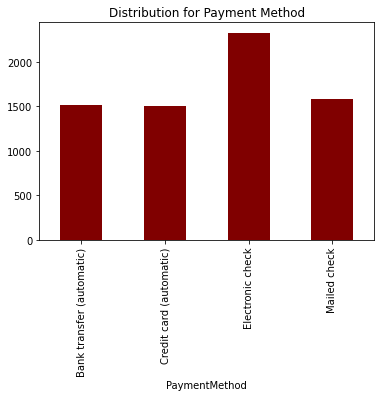

In [402]:
# check the payment method distribution
df.groupby('PaymentMethod').count()['customerID'].plot(kind='bar',
                                                       color='maroon',
                                                       grid=False,
                                                       figsize=(6,4),
                                                       title='Distribution for Payment Method');

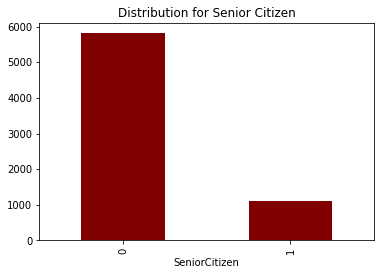

In [403]:
# check the Senior Citizen distribution
df.groupby('SeniorCitizen').count()['customerID'].plot(kind='bar',
                                                       color='maroon',
                                                       grid=False,
                                                       figsize=(6,4),
                                                       title='Distribution for Senior Citizen');

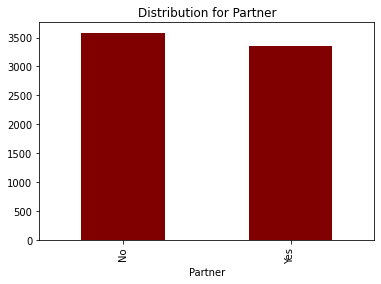

In [404]:
# check the partner distribution
df.groupby('Partner').count()['customerID'].plot(kind='bar',
                                                  color='maroon',
                                                  grid=False,
                                                  figsize=(6,4),
                                                  title='Distribution for Partner');

In [405]:
# Converting boolean variables to a format for further use
df['SeniorCitizen'].loc[df.SeniorCitizen == 1] = 'Yes';
df['SeniorCitizen'].loc[df.SeniorCitizen == 0] = 'No';

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [406]:
# implement one hot encoding
df_trans = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans = pd.concat([df_trans, dummy_vars], axis=1)

df_trans.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.27894,-1.05154,-2.27805,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.06449,0.03461,0.39065,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.23823,-0.05950,-1.44980,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.51230,-0.46541,0.37383,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.23823,0.39824,-1.23229,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [407]:
# check the column names
df_trans.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One yea

In [408]:
# check the dataset information
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   6931 non-null   float64
 1   MonthlyCharges                           6931 non-null   float64
 2   TotalCharges                             6931 non-null   float64
 3   Churn                                    6931 non-null   int64  
 4   gender_Female                            6931 non-null   uint8  
 5   gender_Male                              6931 non-null   uint8  
 6   SeniorCitizen_No                         6931 non-null   uint8  
 7   SeniorCitizen_Yes                        6931 non-null   uint8  
 8   Partner_No                               6931 non-null   uint8  
 9   Partner_Yes                              6931 non-null   uint8  
 10  Dependents_No                            6931 no

# Modelling

In [409]:
# define target variable and features
target = 'Churn'
predictor = [x for x in list(df_trans.columns) if x != target]

In [410]:
# build the model
model = Sequential()
model.add(Dense(16, input_dim=len(predictor), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [411]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [412]:
# split the train test
X_train, X_test, y_train, y_test = train_test_split(df_trans[predictor], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                   random_state=23)
X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1959,1.36721,-0.03010,0.78093,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2884,1.04153,-0.18422,0.67067,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
5527,-0.95326,-0.79840,-0.80179,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
1173,0.55301,0.58912,0.80429,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
971,1.08224,0.51867,0.95499,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0


In [413]:
# run the model
%%time
history = model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
56/56 [==============================] - 1s 2ms/step - loss: 0.6167 - accuracy: 0.7325
Epoch 2/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7426
Epoch 3/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7319
Epoch 4/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7354
Epoch 5/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7870
Epoch 6/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7991
Epoch 7/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8077
Epoch 8/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8056
Epoch 9/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8047
Epoch 10/50
56/56 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7971
Epoch 11/50
56/56 [

# Evaluation

In [414]:
# Predict the label
train_set_preds = model.predict_classes(X_train)
test_set_preds = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [415]:
# see the classification report
print(classification_report(y_test, test_set_preds, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1008
         Yes       0.70      0.49      0.58       379

    accuracy                           0.80      1387
   macro avg       0.77      0.71      0.73      1387
weighted avg       0.79      0.80      0.79      1387



Text(69.0, 0.5, 'Actual')

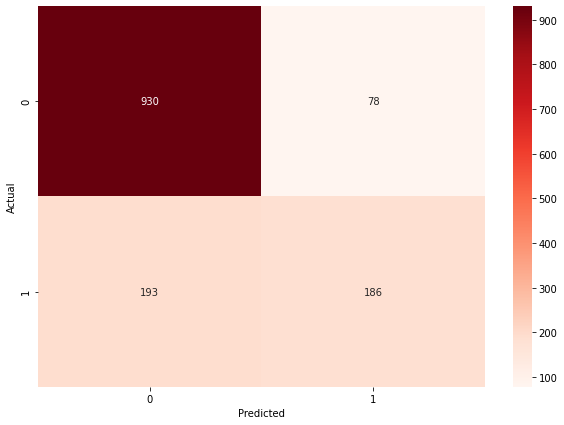

In [416]:
#  Visualization of confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=test_set_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')

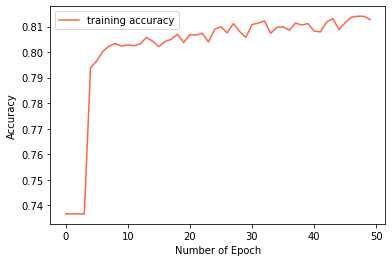

In [417]:
# visualize the accuracy
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training accuracy', color = 'tomato')
plt.legend()
plt.show()

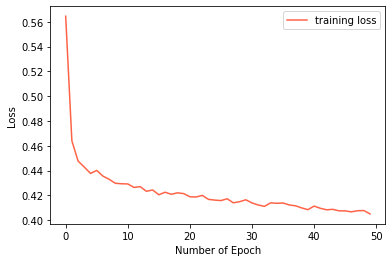

In [418]:
# visualize the accuracy
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training loss', color = 'tomato')
plt.legend()
plt.show()

In [419]:
# predict the data
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [420]:
# Show the ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

In [421]:
# show the AUC
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for test set: %0.4f' % test_roc_auc)
print('AUC for train set: %0.4f' % train_roc_auc)

AUC for test set: 0.8513
AUC for train set: 0.8621


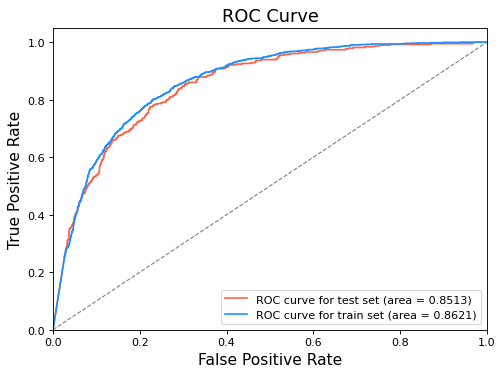

In [422]:
# Visualize the ROC 
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

# Testing with test.csv

## Load Dataset

In [423]:
# load dataset
df_new = pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/Practical%20Case/test_df6.csv")
df_new.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50000,30.50000
1,1,9039-ZVJDC,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10000,53.05000
2,2,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30000,6859.50000
3,3,9013-AQORL,Female,0,No,Yes,48,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55000,2108.35000
4,4,2898-MRKPI,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05000,6770.50000


## Data Pre-processing

In [424]:
# check the null value
df_new.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [425]:
# check the dataste information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   customerID        100 non-null    object 
 2   gender            100 non-null    object 
 3   SeniorCitizen     100 non-null    int64  
 4   Partner           100 non-null    object 
 5   Dependents        100 non-null    object 
 6   tenure            100 non-null    int64  
 7   PhoneService      100 non-null    object 
 8   MultipleLines     100 non-null    object 
 9   InternetService   100 non-null    object 
 10  OnlineSecurity    100 non-null    object 
 11  OnlineBackup      100 non-null    object 
 12  DeviceProtection  100 non-null    object 
 13  TechSupport       100 non-null    object 
 14  StreamingTV       100 non-null    object 
 15  StreamingMovies   100 non-null    object 
 16  Contract          100 non-null    object 
 17

In [426]:
# Drop the unnecessary column
df_new.drop(columns=['Unnamed: 0'],inplace=True)

In [427]:
# replace white space with null value
df_new['TotalCharges'] = df_new['TotalCharges'].replace(' ', np.nan).astype(float)

In [428]:
# check thebasic statistic
df_new['TotalCharges'].describe()

count    100.00000
mean    2437.53950
std     2194.48818
min       20.50000
25%      648.50000
50%     1686.00000
75%     3957.16250
max     7544.30000
Name: TotalCharges, dtype: float64

In [429]:
# normalize the dataset
df_new['MonthlyCharges'] = np.log(df_new['MonthlyCharges'])
df_new['MonthlyCharges'] = (df_new['MonthlyCharges'] - df_new['MonthlyCharges'].mean()) / df_new['MonthlyCharges'].std()

In [430]:
# normalize the dataset
df_new['TotalCharges'] = np.log(df_new['TotalCharges'])
df_new['TotalCharges'] = (df_new['TotalCharges'] - df_new['TotalCharges'].mean()) / df_new['TotalCharges'].std()

In [431]:
# normalize the dataset
df_new['tenure'] = (df_new['tenure'] - df_new['tenure'].mean()) / df_new['tenure'].std()

In [432]:
# set the number after decimal
pd.options.display.float_format = "{:.5f}".format
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0032-PGELS,Female,0,Yes,Yes,-1.35800,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),-1.25995,-2.50371
1,9039-ZVJDC,Male,0,No,No,-1.27173,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,-2.11844,-2.12898
2,6797-LNAQX,Male,0,Yes,Yes,1.61856,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),0.88665,1.16272
3,9013-AQORL,Female,0,No,Yes,0.66951,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),-0.52427,0.36404
4,2898-MRKPI,Male,0,Yes,Yes,1.53228,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),0.93725,1.15388


In [433]:
# check the basic statistic
df_new[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,100.00000,100.00000,100.00000
mean,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000
min,-1.35800,-2.11844,-2.77268
25%,-0.88348,-0.55118,-0.43670
50%,-0.17169,0.37569,0.21269
75%,0.76657,0.79874,0.79025
max,1.70484,1.12515,1.22714


In [434]:
# check the unique value
for column in list(df_new.columns):
    print(column, df_new[column].nunique())

customerID 100
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 55
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 96
TotalCharges 100


In [435]:
# Converting boolean variables to a format for further use
df_new['SeniorCitizen'].loc[df_new.SeniorCitizen == 1] = 'Yes';
df_new['SeniorCitizen'].loc[df_new.SeniorCitizen == 0] = 'No';

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [436]:
# implement one hot encoding
df_trans_new = df_new[['tenure', 'MonthlyCharges', 'TotalCharges']].copy(deep=True)

for col in list(df_new.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges'] and df_new[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df_new[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans_new = pd.concat([df_trans_new, dummy_vars], axis=1)

df_trans_new.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.35800,-1.25995,-2.50371,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
1,-1.27173,-2.11844,-2.12898,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
2,1.61856,0.88665,1.16272,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0
3,0.66951,-0.52427,0.36404,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
4,1.53228,0.93725,1.15388,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0


In [437]:
# check the column names
df_trans_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

In [438]:
# check the dataset
df_trans_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   100 non-null    float64
 1   MonthlyCharges                           100 non-null    float64
 2   TotalCharges                             100 non-null    float64
 3   gender_Female                            100 non-null    uint8  
 4   gender_Male                              100 non-null    uint8  
 5   SeniorCitizen_No                         100 non-null    uint8  
 6   SeniorCitizen_Yes                        100 non-null    uint8  
 7   Partner_No                               100 non-null    uint8  
 8   Partner_Yes                              100 non-null    uint8  
 9   Dependents_No                            100 non-null    uint8  
 10  Dependents_Yes                           100 non-nu

In [439]:
# predict the testing dataset
test_preds_new = model.predict_classes(df_trans_new)
test_preds_new

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [440]:
# add the label in the testing dataset
df_new['churn predict'] = test_preds_new
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn predict
0,0032-PGELS,Female,No,Yes,Yes,-1.35800,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),-1.25995,-2.50371,0
1,9039-ZVJDC,Male,No,No,No,-1.27173,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,-2.11844,-2.12898,0
2,6797-LNAQX,Male,No,Yes,Yes,1.61856,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),0.88665,1.16272,0
3,9013-AQORL,Female,No,No,Yes,0.66951,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),-0.52427,0.36404,0
4,2898-MRKPI,Male,No,Yes,Yes,1.53228,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),0.93725,1.15388,0


In [441]:
# Decode the label
df_new['churn predict'].loc[df_new['churn predict'] == 1] = 'Yes'
df_new['churn predict'].loc[df_new['churn predict'] == 0] = 'No'
df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn predict
0,0032-PGELS,Female,No,Yes,Yes,-1.35800,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),-1.25995,-2.50371,No
1,9039-ZVJDC,Male,No,No,No,-1.27173,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,-2.11844,-2.12898,No
2,6797-LNAQX,Male,No,Yes,Yes,1.61856,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),0.88665,1.16272,No
3,9013-AQORL,Female,No,No,Yes,0.66951,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),-0.52427,0.36404,No
4,2898-MRKPI,Male,No,Yes,Yes,1.53228,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),0.93725,1.15388,No


In [442]:
# get only 2 columns
df_new2 = df_new[['customerID', 'churn predict']]

In [443]:
# Save to csv
df_new2.to_csv('/content/drive/MyDrive/churn_prediction_.csv', index=False)